In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [2]:
df.tail

<bound method NDFrame.tail of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [3]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [4]:
x=df.iloc[:,:-1]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [5]:
y=df.iloc[:,-1]
y

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

<Axes: xlabel='TV', ylabel='Sales'>

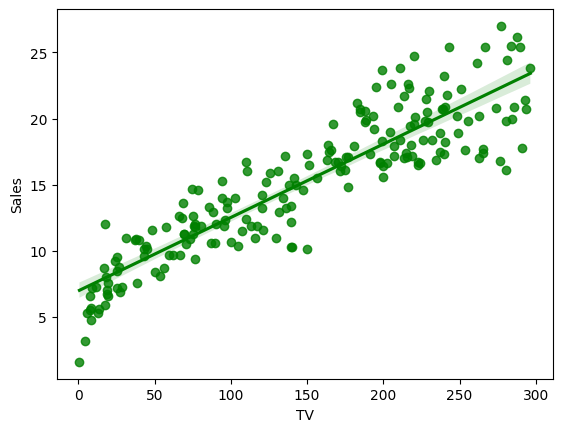

In [6]:
import seaborn as sns
sns.regplot(x=df['TV'],y=y,color='green')

<Axes: xlabel='Radio', ylabel='Sales'>

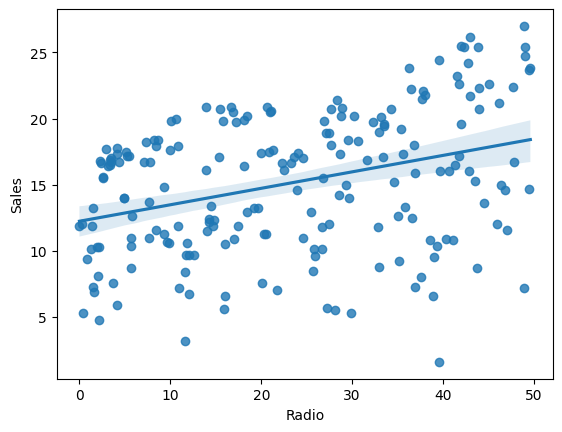

In [7]:
sns.regplot(x=df['Radio'],y=y)

<Axes: xlabel='Newspaper', ylabel='Sales'>

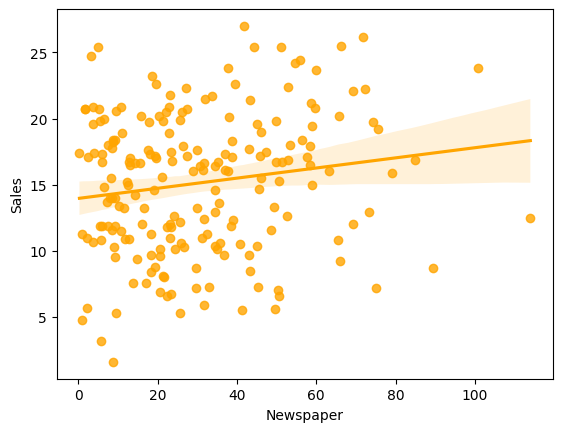

In [8]:
sns.regplot(x=df['Newspaper'],y=y,color='orange')

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,TV,Radio,Newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [11]:
print(model.predict([[30,89,41]]))

[15.81752815]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
print('slope is ',model.coef_)


slope is  [0.05358869 0.10270677 0.00793167]


In [13]:
print('cofficent')
list(zip(x,model.coef_))

cofficent


[('TV', 0.05358869132706914),
 ('Radio', 0.10270676778771287),
 ('Newspaper', 0.007931667677316324)]

In [14]:
print('intercept',model.intercept_)

intercept 4.743766701589685


In [15]:

df1=pd.DataFrame({'Actual_value':y_test,'predict_value':y_pred,'error':y_test-y_pred})
df1

,Actual_value,predict_value,error
95,16.9,17.159919,-0.259919
15,22.4,20.533695,1.866305
30,21.4,23.689144,-2.289144
158,7.3,9.519146,-2.219146
128,24.7,21.607368,3.092632
115,12.6,12.781013,-0.181013
69,22.3,21.086363,1.213637
170,8.4,8.760542,-0.360542
174,16.5,17.115000,-0.615000
45,16.1,16.687896,-0.587896


#performanc evaluation

In [16]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_pred,y_test))

1.1594875061090582


In [17]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error
print('mean absolute percentage',mean_absolute_percentage_error(y_test,y_pred))

mean absolute percentage 0.10536440823029307


In [18]:

print('mean_squared_error',mean_squared_error(y_test,y_pred))

mean_squared_error 2.541624036229147


In [19]:
from sklearn.metrics import r2_score
print('r2 score is',r2_score(y_test,y_pred))

r2 score is 0.9091484341849799
